In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

#Exploratory Data Analysis (EDA)

**Salary Dataset**
- **YearsExperience:** Employee's years of experience.
- **Salary [Target Column]:** Salary in terms of years of experience.




In [3]:
# # Importing dataset
# file_link = 'https://drive.google.com/file/d/1z_7EFfGJ42o0JCklJz0K77NTzPa-QynQ/view?usp=sharing'

# # get the id part of the file
# id = file_link.split("/")[-2]

# # creating a new link using the id for better readability of csv file in pandas
# new_link = f'https://drive.google.com/uc?id={id}'


df = pd.read_csv("/content/Salary_Data.csv")


X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

# Splitting dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 1/3, random_state = 2 )


# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

# Ridge
#alpha = L2 regularization (squared value), alpha  is not 0
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

# Lasso
#alpha = L1 regularization (absolute value)
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

# ElasticNet
#alpha = mult, l1_ratio = sum or combination
reg = ElasticNet(alpha=0.01,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))



0.9041801644162628
0.9042534117787511
0.9041801799163933
0.904194904373961


Predicted values  [35944.81 34040.53 66413.31]
Real values       [46205. 39343. 61111.]
Trained W         9521.41
Trained b         23566.98


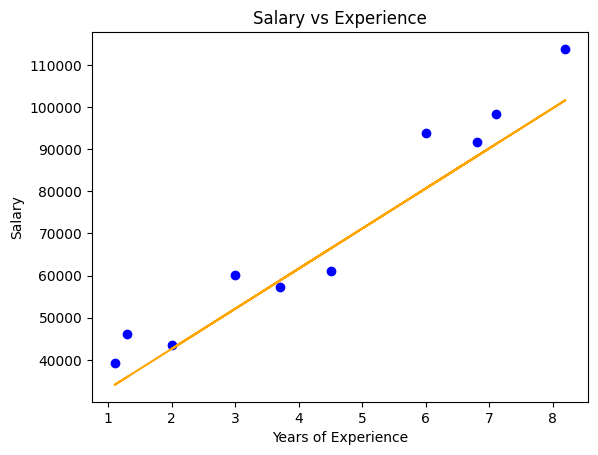

In [7]:
class ElasticNetRegression:

    def __init__(self, learning_rate=0.01, iterations=1000, l1_penalty=1, l2_penalty=1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        for _ in range(self.iterations):
            self.update_weights()

    def update_weights(self):
        y_pred = self.predict(self.X)
        dW = np.zeros(self.n)
        db = 0
        for j in range(self.n):
            dW[j] = (-2 * (self.X[:, j].dot(self.y - y_pred)) + np.sign(self.W[j]) * self.l1_penalty + 2 * self.l2_penalty * self.W[j]) / self.m
        db = -2 * np.sum(self.y - y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X.dot(self.W) + self.b

# Model training
elastic_net_model = ElasticNetRegression(iterations=1000, learning_rate=0.01, l1_penalty=1, l2_penalty=1)
elastic_net_model.fit(X_train, y_train)

# Prediction on test set
y_pred = elastic_net_model.predict(X_test)

print("Predicted values ", np.round(y_pred[:3], 2))
print("Real values      ", y_test[:3])
print("Trained W        ", round(elastic_net_model.W[0], 2))
print("Trained b        ", round(elastic_net_model.b, 2))

# Visualization on test set
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='orange')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


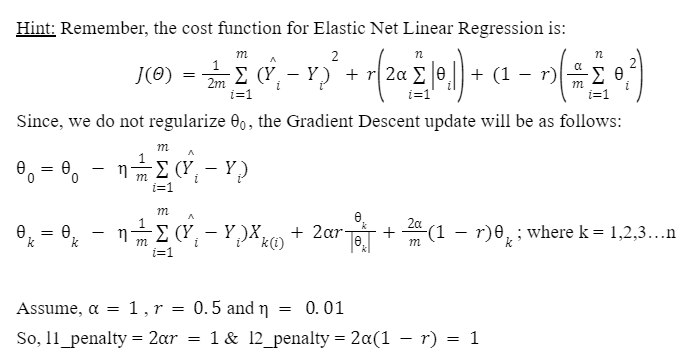